In [264]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import pandas as pd
import seaborn as sns

In [122]:
# Save data in array
with open("kc_house_data.csv") as file_name:
    df = pd.read_csv(file_name, encoding="latin1")

In [123]:
'''
Total variables:
id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,
view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,
zipcode,lat,long,sqft_living15,sqft_lot15

Variables needed: price, sqft_living
'''
# Price without NaN, price is column index 2.
# https://stackoverflow.com/questions/11620914/how-do-i-remove-nan-values-from-a-numpy-array
df = df.dropna(subset=['price'])

# Sqft_living without NaN, var is column index 5
df = df.dropna(subset=['sqft_living'])

# Save data in an array
df_array = df.values

In [124]:
# Price without NaN
df_array[:,2]

array([221900.0, 538000.0, 180000.0, ..., 402101.0, 400000.0, 325000.0],
      dtype=object)

In [125]:
# Sqft_living without NaN
df_array[:,5]

array([1180, 2570, 770, ..., 1020, 1600, 1020], dtype=object)

In [129]:
# Columns to variables. Y is dependent variable. X is independent variable.
# Numpy reshape into 2D to represent columns where -1 infers the size of the new dimension from the size of the input array.
# Use one column
ncols = 1
# Use unknown rows (value -1) so output is similar to
'''
z.reshape(-1,1)
array([[ 1],
   [ 2],
   [ 3],
   [ 4],
   [ 5],
   [ 6],
   [ 7],
   [ 8],
   [ 9],
   [10],
   [11],
   [12]])

'''
nrows = -1
price = df_array[:,2].astype(int).reshape(nrows,ncols)
sqft_living = df_array[:,5].astype(str).astype(int).reshape(nrows,ncols)

In [130]:
# Training variables
sqft_train, sqft_test, price_train, price_test = train_test_split(sqft_living, price, test_size=0.2, random_state=42)

In [131]:
# Create linear regression model
model = LinearRegression()

In [132]:
# Fit model
model.fit(sqft_train, price_train)

LinearRegression()

In [204]:
# R2, intercept, coeficient from adjusted model
r_squared = model.score(sqft_living, price) 
intercept = model.intercept_
coef = model.coef_[0]

# We can predict using model
y_pred = model.predict(sqft_test)

# Create a value range for X
x_range = np.linspace(sqft_living.min(), sqft_living.max(), 100).reshape(-1, 1)

# Create a value range for Y
y_range = coef * x_range + intercept

Text(0, 0.5, 'price')

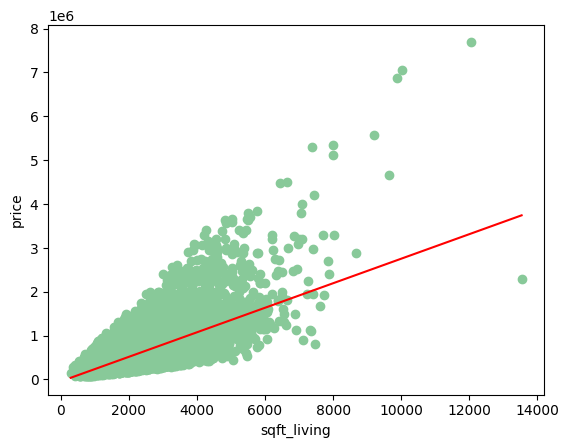

In [205]:
# Graph for better visualization
plt.scatter(sqft_living, price, color = '#88c999')
plt.plot(x_range, y_range, color='red')
plt.xlabel('sqft_living')
plt.ylabel('price')

In [207]:
# Model summary
print("Model summary:")
print("--------------------")
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
print(f"Intercept: {intercept}")
print(f"Coeficient: {coef}")
print(f"R^2: {round(r_squared, 2)}")
print()

Model summary:
--------------------
Intercept: [-41999.19]
Coeficient: [ 279.55]
R^2: 0.49



In [208]:
# Integer arrays
price = price.astype(int)
sqft_living = sqft_living.astype(str).astype(int)

In [209]:
price.shape

(21613, 1)

In [210]:
sqft_living.shape

(21613, 1)

In [211]:
# Scaler object
scaler = StandardScaler()

# Normalize data
# After applying StandardScaler, the scaled data will have a mean of zero and a standard deviation of one
normalized_sqft = np.ones((sqft_living.shape[0], 1))

# Here, we create an instance of StandardScaler and then use the fit_transform method to apply the transformation to the original data. 
# The fit_transform method fits the scaler to the data and then transforms the data in one step.
normalized_sqft = np.hstack((normalized_sqft, scaler.fit_transform(sqft_living)))

In [220]:
# Theta: gradient descent
# It is common practice to start with a small alpha (e.g. 0.01) and gradually increase it 
# until the convergence rate starts to slow down or the updates become unstable.
# A common approach is to start with a relatively large number of iterations (e.g. 1000) 
# and monitor the cost function at each iteration.
def gradient_descent(X, y, alpha = 0.01, iterations = 1000):
    """
    Performs gradient descent to learn the optimal values of theta
    :param X: the feature matrix
    :param y: the target values
    :param alpha: the learning rate
    :param iterations: the number of iterations to perform
    :return: the learned values of theta
    """
    m, n = X.shape
    theta = np.zeros((X.shape[1], 1))
    for i in range(iterations):
        # Calculate the predicted values for the current values of theta
        h = np.dot(X, theta)
        # Calculate the error (difference between predicted and actual values)
        error = h - y
        # Calculate the gradient (partial derivative of the cost function)
        gradient = X.T.dot(error) / m
        # Update theta by taking a step in the opposite direction of the gradient
        theta -= alpha * gradient
    return theta

# Normalize 2D numpy array, use the axis 
# argument to specify which axis to normalize or standardize along. 
def normalize_arr(base, target):
    X_normalized = (target - np.mean(base, axis=0)) / np.std(base, axis=0)
    return X_normalized

# Note that the input arr must have at least 2 dimensions 
# for standardization to make sense.
def standardize_arr(arr):
    # Add a column of ones to the standardized array
    X_std = np.hstack((np.ones((arr.shape[0], 1)), arr))
    return X_std

In [221]:
# Theta value
theta = gradient_descent(normalized_sqft, price)
prices_pred = np.array([])

for i in sqft_train:
    # print(i)
    sl_pred = np.array([i])
    sl_pred = normalize_arr(sqft_living, sl_pred)
    sl_pred = standardize_arr(sl_pred.astype(float))
    price_pred = np.dot(sl_pred, theta)
    prices_pred = np.append(prices_pred, price_pred[0])

# Reshape arrays into (-1, 1)
y_pred = prices_pred.reshape(-1, 1)
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
y_test = price_test.reshape(-1, 1)

In [222]:
# Print the first few values predicted vs real
print("Predictions vs Real prices:")
print("-----------------------------")
for i in range(10):
    print(f"Prediction: {y_pred[i]}, Real price: {y_test[i]}")

Predictions vs Real prices:
-----------------------------
Prediction: [ 455909.52], Real price: [365000]
Prediction: [ 237032.59], Real price: [865000]
Prediction: [ 259481.51], Real price: [1038000]
Prediction: [ 542899.08], Real price: [1490000]
Prediction: [ 444965.68], Real price: [711000]
Prediction: [ 613051.94], Real price: [211000]
Prediction: [ 528868.50], Real price: [790000]
Prediction: [ 888051.16], Real price: [680000]
Prediction: [ 450297.30], Real price: [384500]
Prediction: [ 408205.58], Real price: [605000]


In [215]:
# Create a value range for X
x_range = np.linspace(sqft_train.min(), sqft_train.max(), len(sqft_train))

# Create a value range for Y
y_range = np.sort(prices_pred)

Text(0, 0.5, 'price')

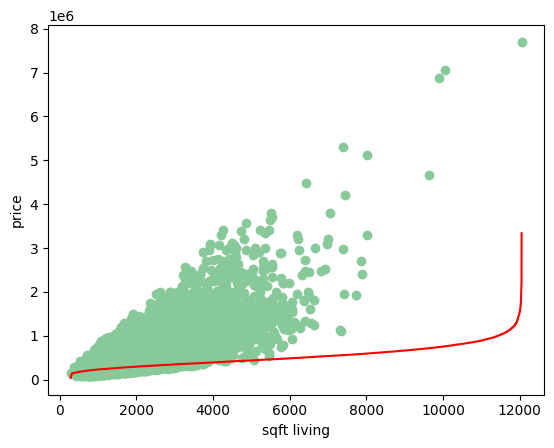

In [217]:
# Graph for better visualization
plt.scatter(x=sqft_train, y=price_train, color = '#88c999')
plt.plot(x_range, y_range, color='red', label='regresion')
plt.xlabel('sqft living')
plt.ylabel('price')

In [273]:
# Save R2 values after polynomial features test
r_squared_values = []

# Training variables
# sqft_train, sqft_test, price_train, price_test = train_test_split(sqft_living, price, test_size=0.2, random_state=42)

# X, y data
X = sqft_living.reshape(-1, 1)
y = price.reshape(-1, 1)

# Define the degrees of the polynomial models to fit
degrees = [1, 2, 3, 4, 5, 6, 7, 8]

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(sqft_train)
    model = LinearRegression()
    model.fit(X_train_poly, price_train)
    
    # Evaluate the model on the validation set using MSE
    X_val_poly = poly.transform(sqft_test)
    y_val_pred = model.predict(X_val_poly)
    mse = mean_squared_error(price_test, y_val_pred)
    r_squared_values.append(mse)

# Find the degree of the model with the lowest MSE
best_degree = degrees[np.argmin(r_squared_values)]


In [274]:
# Note that a higher degree polynomial will generally fit the data better, 
# but may also overfit the data and not generalize well to new data. 
# Therefore, it is important to balance model complexity with 
# generalization performance.
def Sort(sub_li):
    # reverse = None (Sorts in Ascending order)
    # key is set to sort using second element of
    # sublist lambda has been used
    sub_li.sort(key = lambda x: x[1], reverse = True)
    return sub_li

In [275]:
print("Best polynomial fit:")
print("-----------------------------")
print("Best polynomial fit has degree of:", best_degree)

Best polynomial fit:
-----------------------------
Best polynomial fit has degree of: 6


In [281]:
print("Findings")
print("-----------------------------")
print("\n     Se usaron varias librerias que ayudaron mucho al proceso de \
    obtener todos los datos necesarios para este laboratorio, \
    especialmente el sklearn y matplotlib. \
    \n     El modelo de regresion lineal no fue lo que se esperaba. \
    Este modelo presento varios problemas, lo que se puede ver en \
    el valor del coeficiente de correlacion R2 con un valor del 0.49. \
    Ni siquiera pudo predecir la mitad con cierta exactitud. Este proceso \
    ya se habia realizado antes, para la clase de Mineria de datos. \
    Sin embargo, aunque se realizo el mismo proceso para las dos materias, \
    el R2 para la clase mencionada fue de 0.84. Un R2 mucho mejor que este. \
    \nGrafico 1: Una nube de puntos graficada junto a una regresion lineal con \
    su pendiente correspondiente. \
    \nGrafico 2: Una nube de puntos graficada junto a la tendencia del modelo \
    que se entreno. Entre mas bajo el valor, la prediccion funciona. Sin embargo, \
    una vez se sale de los valores mas bajos, el modelo empieza a predecir \
    valores demasiado distantes a los valores reales. \
    \n     No estoy de acuerdo con el mejor grado de polinomio, debido a que este \
    se obtuvo de manera manual tambien antes de utilizar argmin. \
    Como mencione en un comentario casi en las ultimas partes dentro \
    del codigo, un grado mayor se adapta mejor a los datos existentes, pero \
    no significa que con nuevos datos se vaya a comportar igual. Al \
    obtenerlo de manera manual, se observo que aunque el 6 se adaptaba mejor, \
    un grado 4 era el que probablemente era mejor para el dataset existente, \
    y para datos futuros ingresados. Se cree que muchos datos outliers \
    afectaron los resultados y predicciones. Si conozco como remover estos \
    datos, pero no sabia si para este laboratorio era apropiado hacerlo. \
    Talvez otras variables que afectan al precio pudieron ser usadas para \
    lograr una mejor prediccion.")

Findings
-----------------------------

     Se usaron varias librerias que ayudaron mucho al proceso de     obtener todos los datos necesarios para este laboratorio,     especialmente el sklearn y matplotlib.     
     El modelo de regresion lineal no fue lo que se esperaba.     Este modelo presento varios problemas, lo que se puede ver en     el valor del coeficiente de correlacion R2 con un valor del 0.49.     Ni siquiera pudo predecir la mitad con cierta exactitud. Este proceso     ya se habia realizado antes, para la clase de Mineria de datos.     Sin embargo, aunque se realizo el mismo proceso para las dos materias,     el R2 para la clase mencionada fue de 0.84. Un R2 mucho mejor que este.     
Grafico 1: Una nube de puntos graficada junto a una regresion lineal con     su pendiente correspondiente.     
Grafico 2: Una nube de puntos graficada junto a la tendencia del modelo     que se entreno. Entre mas bajo el valor, la prediccion funciona. Sin embargo,     una vez se sale de 